In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
np.random.seed(0)

d = 2
n_tr = 100
n_te = 100

# Define the true coefficient vector:
# a_true = np.random.rand(d)
a_true = np.array([1, 0])

def f_true(x):
    return x @ a_true

# Generate input data for the training set:
x_tr = np.random.randn(n_tr, d)
noise_tr = np.random.randn(n_tr)
y_tr = f_true(x_tr) + noise_tr

x_te = np.random.randn(n_te, d)
# noise_te = np.random.randn(n_te)
# y_te_true = f_true(x_te) + noise_te

del noise_tr, a_true

Having input data `x_tr` and output data `y_tr`. `x_tr` is a $n$-by-$d$ matrix and `y_tr` is a $n$-dimensional vector, where $n$ is the number of data and $d$ is the data dimensionality. Each row of `x_tr` (`x_tr[i, :]`) is a single data record.

Each data record `(x_tr[i, :], y_tr[i])` satisfies
\begin{equation*}
  y_\text{tr}[i] = \boldsymbol{x}_\text{tr}[i, :]^\top \boldsymbol{a}_\text{true} + \varepsilon_i
\end{equation*}
with unknown $\boldsymbol{a}_\text{true}$ and unknown noise $\varepsilon_i$ for which $\mathbb{E}[\varepsilon_i \mid \boldsymbol{x}_{tr}[i, :]] = 0$.

Estimate the coefficients of the linear function, $\boldsymbol{a}_\text{true}$, using the ridge regression with the regularization parameter $\lambda = 0.1$. Print the result using `print()`.

In [3]:
n, d = x_tr.shape
lam = 0.1
a = np.linalg.solve(x_tr.T @ x_tr + lam * np.eye(d), x_tr.T @ y_tr)
print(a)

[ 1.10928327 -0.06098309]


The ridge regression estimate is given by $\hat{\boldsymbol{a}} := (\boldsymbol{x}_\text{tr}^\top \boldsymbol{x}_\text{tr} + \lambda \boldsymbol{I}_d)^{-1} \boldsymbol{x}_\text{tr}^\top \boldsymbol{y}_\text{tr}$. This is equivalent to solving $(\boldsymbol{x}_\text{tr}^\top \boldsymbol{x}_\text{tr} + \lambda \boldsymbol{I}_d)\hat{\boldsymbol{a}} = \boldsymbol{x}_\text{tr}^\top \boldsymbol{y}_\text{tr}$.

There are two approaches based on those two formulas. You can pick either of them.

### Approach 1
The approach using the first formula $\hat{\boldsymbol{a}} := (\boldsymbol{x}_\text{tr}^\top \boldsymbol{x}_\text{tr} + \lambda \boldsymbol{I}_d)^{-1} \boldsymbol{x}_\text{tr}^\top \boldsymbol{y}_\text{tr}$ needs inverting a matrix. You can obtain the inverse of matrix $A$ by
```python
a = np.linalg.inv(A)
```

### Approach 2
The approach using the second formula $(\boldsymbol{x}_\text{tr}^\top \boldsymbol{x}_\text{tr} + \lambda \boldsymbol{I}_d)\hat{\boldsymbol{a}} = \boldsymbol{x}_\text{tr}^\top \boldsymbol{y}_\text{tr}$ needs solving linear equations. You can obtain the solution $\boldsymbol{a}$ to $\boldsymbol{A} \boldsymbol{a} = \boldsymbol{y}$ by
```python
a = np.linalg.solve(A, y)
```


Having input data `x_te`. `x_te` is a $n$-by-$d$ matrix. Make predictions for each data `x_te[i, :]` using the estimate obtained in Exercise 6.S1. Show the result with a scatter plot. (You can either use the first dimension of `x_te` for the horizontal axis or do a 3D plot.)

Text(0, 0.5, 'y')

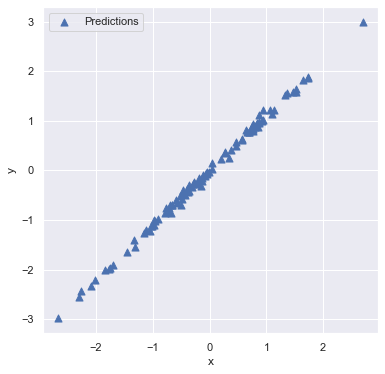

In [4]:
y_te_hat = x_te @ a.T

fig, ax = plt.subplots(figsize=(6, 6))

## Plot the prediction on test data:
ax.scatter(x_te[:, 0], y_te_hat, s=50, marker='^', label='Predictions')

ax.legend(loc='upper left')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [5]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs=x_te[:, 0], ys=x_te[:, 1], zs=y_te_hat, label='Predictions')

ax.legend()

# setting title and labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

ModuleNotFoundError: No module named 'ipympl'